# Introduction

After deciding to open a small cafe in Los Angeles, with a unique concept, namely 'employing' robots as waiters or waitresses, we need investors to get sizable capital. with a concept like that it is very promising because with current market conditions which may still be rare with this concept it will be very profitable for us. with success like that, we have to predict how our cafe will be in the future, one of which is if the appeal of the robot has begun to fade.

in this project we will conduct a market research analysis with data from open sources related to how restaurants/cafes are in LA.

# Goals

Analyze how the restaurants in LA:

- Analyze the proportion of business and what type of business is being loved.
- What is the proportion of franchise business or not in LA.
- Which is the best place to open our business.
- How does the place/ number of seats affect the restaurants.

# Stages

First, I'd evaluate the quality of the data and see if the problem is significant. Then, during the pre-processing of the data, I will try to account for the most serious problems.

The project will consist of three phases:

- Data Overview
- Data Pre-processing
- Analyzing Data

## Data Overview 

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [17]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [18]:
estl = pd.read_csv('rest_data_us.csv')

In [19]:
estl.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [20]:
estl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


#### Early Conclusion 1
- This restaurant table contains 6 columns containing 2 integer data types and 4 object data types.

The following is a description of the df table:

- object_name — the name of the business
- chain — chain-based venture (True/False)
- object_type — the type of business
- address — address
- number — the number of seats

in the data information above we can see one problem, namely that there is a missing value in the 'chain' column. the rest looks like this table looks fine. Next, we will carry out the data pre-processing stage

## Data Pre-processing

In [21]:
estl.duplicated().sum()

0

In [22]:
estl['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

### Lost Value

In [23]:
estl.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [24]:
estl[estl['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [25]:
# Percentage of the lost value
estl.isna().sum() / len(estl) * 100

id             0.000000
object_name    0.000000
address        0.000000
chain          0.031085
object_type    0.000000
number         0.000000
dtype: float64

### Erasing lost value

In [26]:
df = estl.dropna().reset_index()
df

,index,id,object_name,address,chain,object_type,number
0,0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...,...
9643,9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9644,9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9645,9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9646,9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        9648 non-null   int64 
 1   id           9648 non-null   int64 
 2   object_name  9648 non-null   object
 3   address      9648 non-null   object
 4   chain        9648 non-null   object
 5   object_type  9648 non-null   object
 6   number       9648 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 527.8+ KB


## Analyzing Data 

In [28]:
df2 = pd.DataFrame(df['object_type'].value_counts()).reset_index()
df2.rename(columns={'index': 'object','object_type' : 'count'}, inplace=True)
df2

,object,count
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


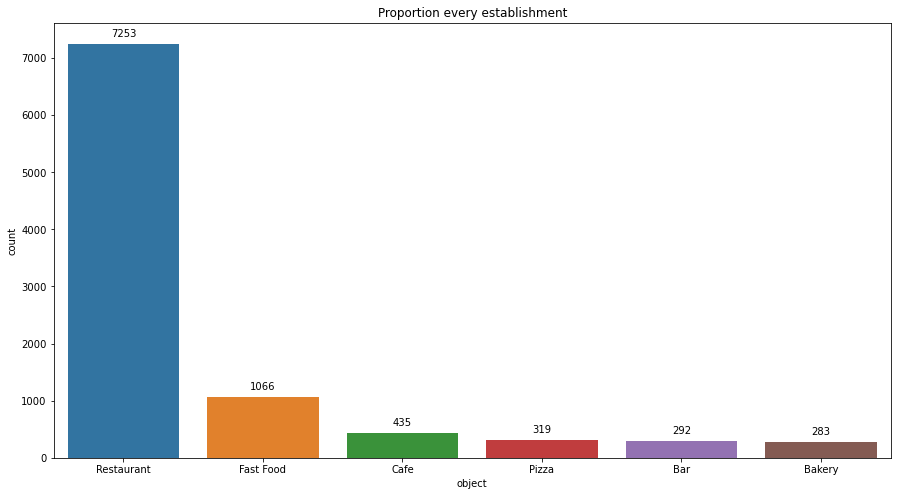

In [29]:
plt.figure(figsize= (15,8))
splot =sns.barplot(data= df2, x='object', y='count')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
plt.title('Proportion every establishment')
plt.show()

In [30]:
df2['proportion'] = df2['count'] / df2['count'].sum() * 100
df2

,object,count,proportion
0,Restaurant,7253,75.176202
1,Fast Food,1066,11.048922
2,Cafe,435,4.508706
3,Pizza,319,3.306385
4,Bar,292,3.026534
5,Bakery,283,2.933250


### Finding Frenchise Based Establisment

In [31]:
chain = pd.DataFrame(df['chain'].value_counts()).reset_index()
chain.rename(columns={'index': 'chain','chain' : 'count'}, inplace=True)
chain

,chain,count
0,False,5972
1,True,3676


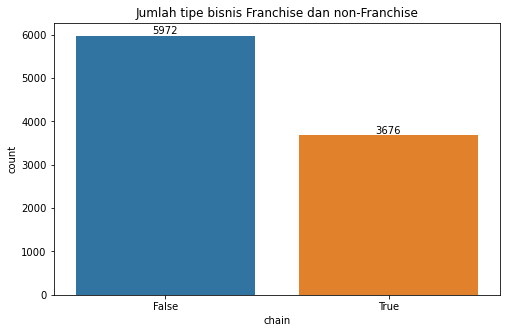

In [32]:
plt.figure(figsize= (8,5))
schain =sns.barplot(data= chain, x='chain', y='count')
for g in schain.patches:
     schain.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.title('Jumlah tipe bisnis Franchise dan non-Franchise')
plt.show()

In [33]:
chain['proportion'] = chain['count'] / chain['count'].sum() * 100
chain

,chain,count,proportion
0,False,5972,61.898839
1,True,3676,38.101161


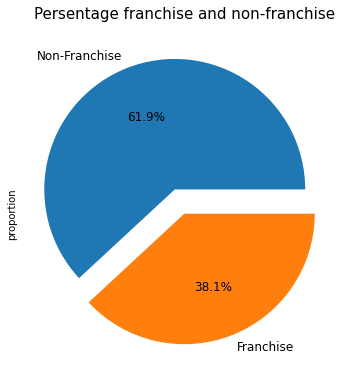

In [34]:
myexplode = [0.2, 0]
labels = ['Non-Franchise', 'Franchise']
chain['proportion'].plot(kind='pie',explode = myexplode, autopct='%1.1f%%', 
                         figsize=(9,6), fontsize=12, labels= labels)
plt.title('Persentage franchise and non-franchise', pad=32, fontsize=15)
plt.show()

#### Early Conclusion 2

- 61.9% of businesses in LA are not franchise-based, which means that as many as 5972 restaurant businesses in LA are owned by individuals
- 38.1% is franchise-based, where 3,676 restaurants work together in establishing the business

In [35]:
estl_chain = df.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count')
estl_chain

chain,False,True
object_type,,
Bakery,NaN,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,153.0
Restaurant,4961.0,2292.0


In [36]:
estl_chain.fillna(1, inplace=True)
estl_chain

chain,False,True
object_type,,
Bakery,1.0,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,153.0
Restaurant,4961.0,2292.0


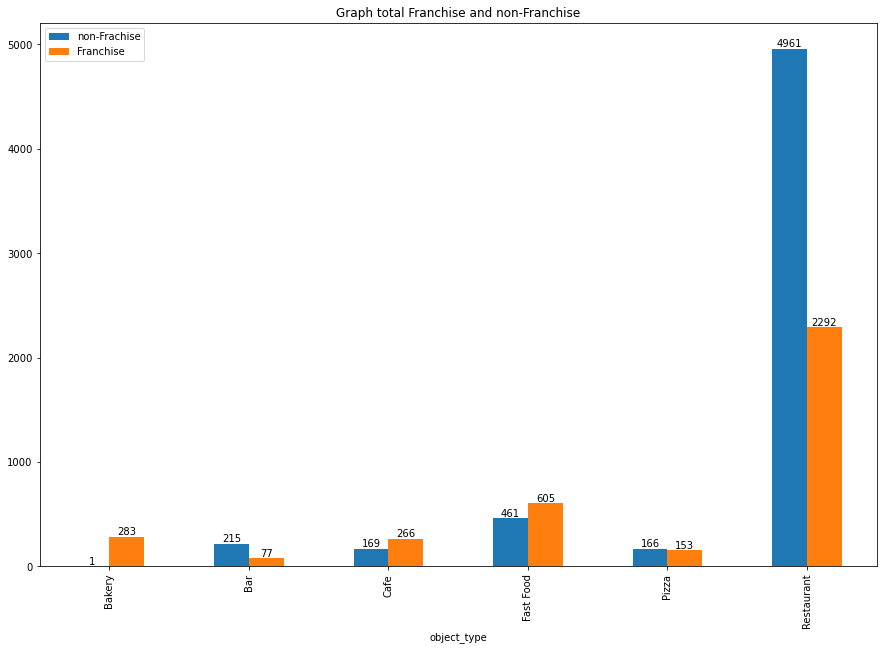

In [37]:
a = estl_chain.plot.bar(figsize=(15,10))
for g in a.patches:
     a.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.title('Graph total Franchise and non-Franchise')
plt.legend(["non-Frachise", "Franchise"])
plt.show()

In [38]:
estl_chain['ratio'] = estl_chain[True] /(estl_chain[True] +estl_chain[False]) * 100
estl_chain.sort_values(by='ratio', ascending=False)

chain,False,True,ratio
object_type,,,
Bakery,1.0,283.0,99.647887
Cafe,169.0,266.0,61.149425
Fast Food,461.0,605.0,56.754221
Pizza,166.0,153.0,47.962382
Restaurant,4961.0,2292.0,31.600717
Bar,215.0,77.0,26.369863


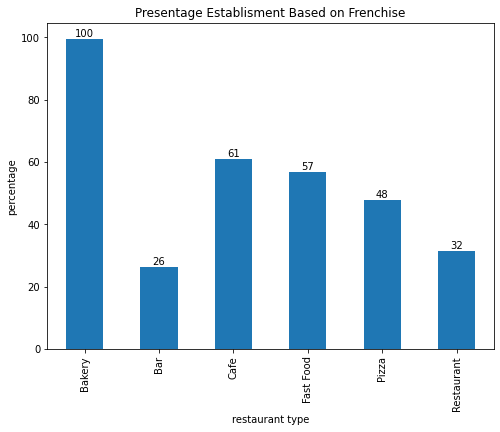

In [39]:
b = estl_chain['ratio'].plot.bar(figsize=(8,6))
for g in b.patches:
     b.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.xlabel('restaurant type')
plt.ylabel('percentage')
plt.title('Presentage Establisment Based on Frenchise')
plt.show()

#### Early Conclusion 3

- of the 283 types of bakery businesses, all of them are franchise business types.
- 3 of the 6 types of businesses, namely bakery, cafe, fast food, are dominated by franchise business types.
- the rest are non-franchise-based bar, pizza and restaurant businesses, or owned by individuals.

- 100% type of bakery business shows the type of franchise business, in the graph above the value is 99.6% because we replace the missing value or empty value with 1 in the non-frachise business type in the Bakery business
- second place in the type of cafe business with 61.1% having a franchise business type
- then the most recent is the type of bar business which has 26.4%, meaning the remaining 73.6% type of bar business is owned by individuals or non-franchises

### Finding characteristic by chair to determaine frenchise business establishment 

- We now characteristics of a franchise-based business type. for example do they have a lot of places everywhere by the number of seats or vice versa?

In [40]:
estl_chain_true = df[df['chain']== True]
estl_chain_true

,index,id,object_name,address,chain,object_type,number
8,8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...,...
9626,9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9633,9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47
9636,9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9645,9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [41]:
estl_chain_true.sample(frac=0.1)

,index,id,object_name,address,chain,object_type,number
7894,7896,19682,TACOS LA PARRILLA RESTAURANT,8923 S SAN PEDRO ST,True,Fast Food,21
8435,8437,20223,KARIHANG-PINOY RESTAURANT,4909 SANTA MONICA BLVD,True,Restaurant,27
8369,8371,20157,CARL'S JR,1001 W MLK BLVD,True,Restaurant,91
3959,3959,15745,GARDELIS RESTAURANT,7963 MELROSE AVE,True,Restaurant,103
8758,8761,20547,STARBUCKS #49792,1120 W 6TH ST # 102,True,Cafe,32
...,...,...,...,...,...,...,...
4001,4001,15787,EL PESCADOR RESTAURANT #9,5230 N FIGUEROA ST,True,Restaurant,77
677,677,12463,MCDONALD'S # 25642,1660 W VENICE BLVD,True,Restaurant,71
8052,8054,19840,LOUISIANA FRIED CHICKEN,9101 S CENTRAL AVE,True,Restaurant,29
2288,2288,14074,PANDA GARDEN,12003 S AVALON BLVD STE 102,True,Restaurant,5


### Checkin chair distribution in establishment 

In [42]:
estl_chain_true[estl_chain_true['object_name'] == 'STARBUCKS']['number'].value_counts()

18    1
27    1
37    1
21    1
9     1
25    1
5     1
10    1
22    1
20    1
15    1
7     1
Name: number, dtype: int64

In [43]:
estl_chain_true[estl_chain_true['object_name'] == 'THE COFFEE BEAN & TEA LEAF']['number'].value_counts()

21    3
16    3
48    3
26    2
49    2
24    2
22    2
38    2
3     2
12    2
18    2
7     2
43    2
9     1
44    1
41    1
28    1
25    1
29    1
74    1
2     1
40    1
31    1
27    1
23    1
42    1
6     1
34    1
15    1
36    1
11    1
Name: number, dtype: int64

<Figure size 3600x2880 with 0 Axes>

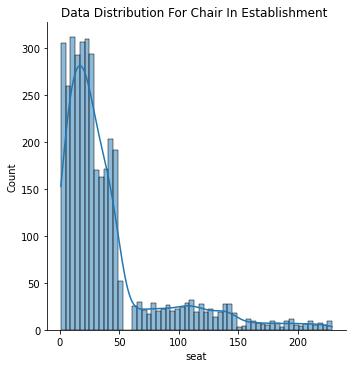

In [44]:
plt.figure(figsize=(50,40))
sns.displot(estl_chain_true['number'], kde=True)
plt.xlabel('seat')
plt.title('Data Distribution For Chair In Establishment ')
plt.show()


In [45]:
estl_chain_true.describe()

,index,id,number
count,3676.000000,3676.000000,3676.000000
mean,4840.003808,16626.003808,39.694233
std,2747.437824,2747.437824,43.437212
min,8.000000,11794.000000,1.000000
25%,2495.500000,14281.500000,13.000000
50%,4838.500000,16624.500000,25.000000
75%,7229.500000,19015.500000,44.000000
max,9650.000000,21436.000000,229.000000


#### Early Conlusion 5
- the average type of franchise business has seating ranging from 1-229 seats.
- The peak of the graph shows that the distribution of data is most concentrated between 0-50, which means that most of these restaurants have 0-50 seats.
- by using the mean method (looking for the average value), we can see that the average number of seats is 39 seats for each restaurantbut because it has an outlier value (an outlier is a very large value from the average value so that it can change the results of the total value) we also have to consider the mode method (middle value), that is, there are an average of 25 seats per restaurant

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Chekin every establishment spot in the city

In [46]:
total_estl = estl_chain_true['object_name'].value_counts(ascending=False)
total_estl

THE COFFEE BEAN & TEA LEAF               47
SUBWAY                                   31
DOMINO'S PIZZA                           15
KENTUCKY FRIED CHICKEN                   14
WABA GRILL                               14
                                         ..
GREYHOUND FOOD SERVICE INC                1
YUM YUM DONUTS # 75-P                     1
STARBUCKS COFFEE #13286                   1
THE FRENCH CREPE COMPANY PREP KITCHEN     1
CAFE SPROUTS                              1
Name: object_name, Length: 2733, dtype: int64

<Figure size 3600x2880 with 0 Axes>

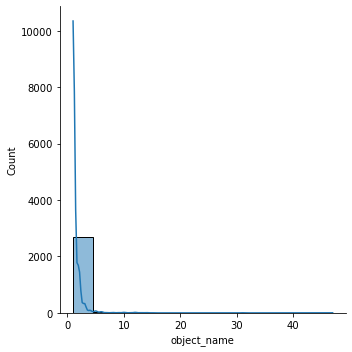

In [47]:
plt.figure(figsize=(50,40))
sns.displot(total_estl, kde=True)
plt.show()

In [48]:
total_estl.describe()

count    2733.000000
mean        1.345042
std         1.489055
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        47.000000
Name: object_name, dtype: float64

#### Early conclusion 6

- the peak is on the x-axis 1-5, meaning that this type of franchise business here only has one to five restaurants.
- there are also businesses that have up to 47 branches namely THE COFFEE BEAN & TEA LEA

### Checkin Corelation Between Establishment and Number of Chairs

In [49]:
estl_chr = estl_chain_true.groupby('object_name').agg({
    'object_name' : 'count', 'number' :'mean'}).rename(columns={'object_name':'total_rest', 'number': 'seat'}).reset_index()
estl_chr.sort_values(by='total_rest', ascending=False)

,object_name,total_rest,seat
2459,THE COFFEE BEAN & TEA LEAF,47,26.723404
2226,SUBWAY,31,16.419355
519,DOMINO'S PIZZA,15,12.333333
2608,WABA GRILL,14,42.857143
1089,KENTUCKY FRIED CHICKEN,14,33.357143
...,...,...,...
1009,JAMBA JUICE #425,1,29.000000
1011,JAMBA JUICE #644,1,12.000000
1012,JAMBA JUICE #661,1,23.000000
1014,JAMBA JUICE #919,1,12.000000


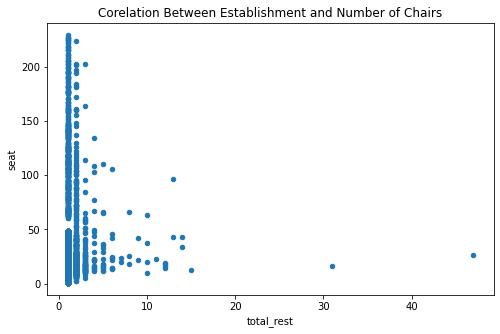

In [50]:
estl_chr.plot.scatter(x='total_rest', y='seat', figsize=(8,5))
plt.title('Corelation Between Establishment and Number of Chairs')
plt.show()

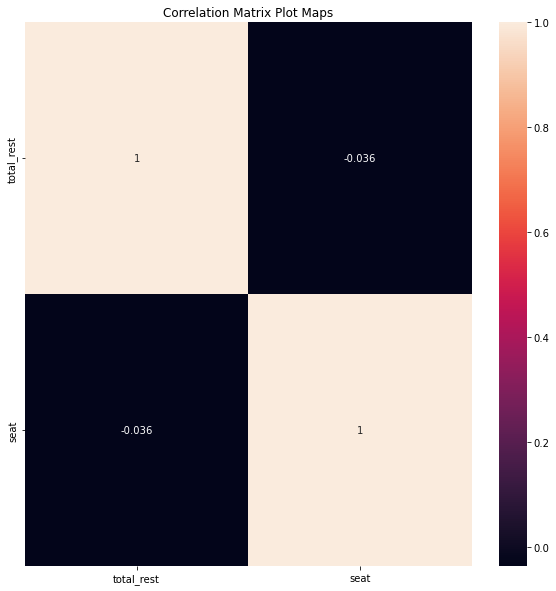

In [51]:
plt.figure(figsize=(10,10))
estl_chr.corr()
sns.heatmap(estl_chr.corr(), annot=True)
plt.title('Correlation Matrix Plot Maps')
plt.show()

#### Early Conclusion 7
- The correlation result is -0.036 which is close to zero, which means there is no correlation between the number of restaurants and the number of seats.
- Where the large number of franchise restaurants does not affect the number of seats in each restaurant. there are restaurants that have many branches but have few seats, there are also restaurants that have only a few branches but have many seats

### Determind the Average Number of Seat for Each Type of Establishment 

In [52]:
estl.groupby('object_type').agg(mean=('number','mean'),median=('number','median'))

,mean,median
object_type,,
Bakery,21.773852,18.0
Bar,44.767123,28.5
Cafe,25.000000,21.0
Fast Food,31.837711,21.0
Pizza,28.459375,18.5
Restaurant,48.042316,29.0


<AxesSubplot:ylabel='object_type'>

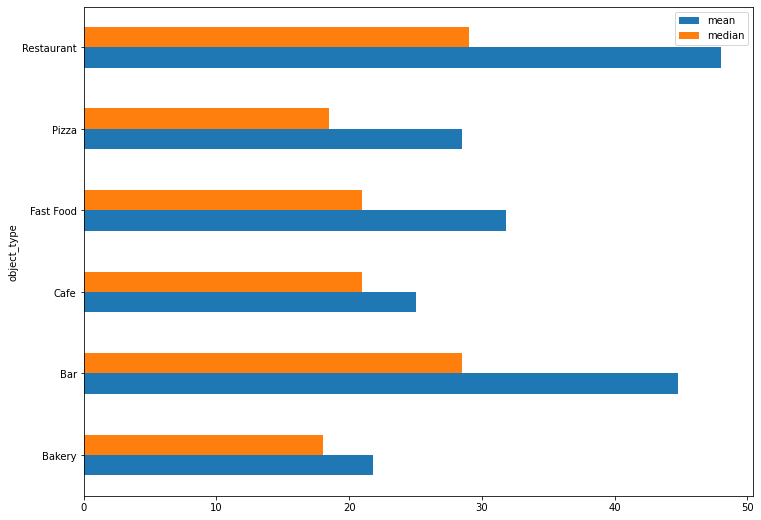

In [53]:
estl.groupby('object_type').agg(mean=('number','mean'),median=('number','median')).plot(kind='barh',figsize=(12,9))

#### Early Conclusion 8

- the average seat for a type of restaurant business is the highest, namely with 29 seats/restaurant
- the second is the type of pizza business with 28 seats per restaurant, which is not much different from the type of restaurant business
- and the least is the type of bakery business with 18 seats/restaurant

### Establishment Based on Street Name

In [54]:
strt = df['address'].apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
strt['count'] = 1

In [55]:
strt

,address,count
0,N EAGLE ROCK BLVD,1
1,WORLD WAY # 120,1
2,HOLLYWOOD BLVD # 253,1
3,W SUNSET BLVD,1
4,ECHO PARK AVE,1
...,...,...
9643,W TEMPLE AVE,1
9644,MELROSE AVE,1
9645,HOLLYWOOD BLVD,1
9646,S SPRING ST STE 100,1


In [56]:
street_group = strt.groupby('address').count().sort_values(by='count', ascending=False).reset_index()
street_group

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
...,...,...
3092,S BROADWAY # #A35,1
3093,S BROADWAY # 3,1
3094,S BROADWAY # 4CC/1,1
3095,S BROADWAY # A-B,1


In [57]:
top_street = street_group.head(10)
top_street

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,MELROSE AVE,128


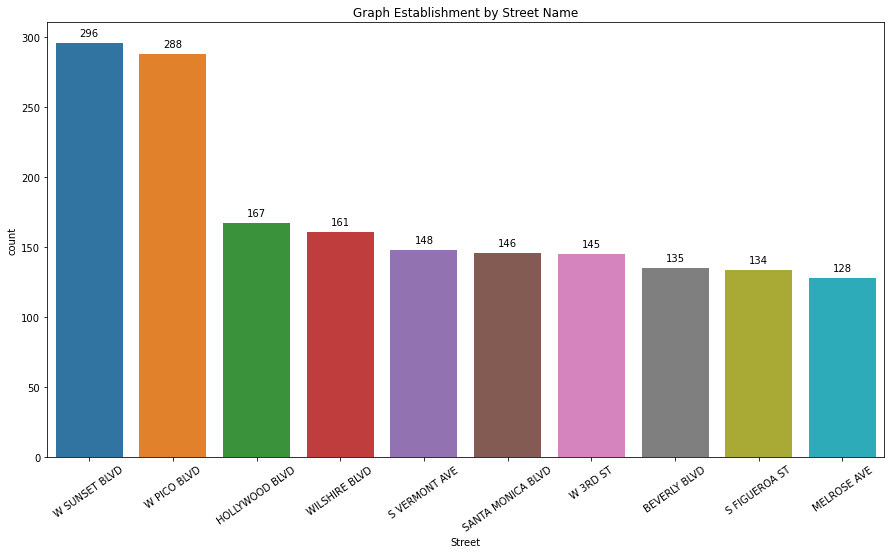

In [58]:
plt.figure(figsize= (15,8))
e = sns.barplot(data=top_street, x='address', y='count')
for g in e.patches:
     e.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
plt.xticks(rotation=35)
plt.xlabel('Street')
plt.ylabel('count')
plt.title('Graph Establishment by Street Name')
plt.show()


In [59]:
only_strt = street_group[street_group['count'] == 1]
only_strt

,address,count
616,UCLA MEDICAL PLZ #170,1
617,W 5TH ST # R-105,1
618,TRIGGS ST,1
619,W 5TH ST # 400,1
620,W 5TH ST # 7100,1
...,...,...
3092,S BROADWAY # #A35,1
3093,S BROADWAY # 3,1
3094,S BROADWAY # 4CC/1,1
3095,S BROADWAY # A-B,1


In [60]:
only_strt.groupby('address').count().sort_values(by='count', ascending = False).\
loc[lambda x: x['count'] == 1].count()[0]

2481

In [61]:
street_moret_1 = street_group[street_group['count'] != 1]
street_moret_1

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
...,...,...
611,CORINTH AVE,2
612,S WESTERN AVE # B,2
613,S VERMONT AVE STE #101,2
614,NEW HIGH ST,2


In [62]:
len(only_strt) / len(street_group) * 100

80.109783661608

#### Early Conclusion 9
- There are 2481 street that only have one restaurant which is 80.1 percent the whole street in LA
- W SUNSET BLVD is the street that have the more restaurant 

### Determine Establishment Average Distribution of Chair Proportion by Street 

In [63]:
top_street

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,MELROSE AVE,128


In [64]:
street_w_sunset = df[df['address'].str.contains('W SUNSET BLVD')][['address','number']]
street_w_sunset

,address,number
3,1814 W SUNSET BLVD,22
10,5319 W SUNSET BLVD,38
14,2501 W SUNSET BLVD #A,26
31,5625 W SUNSET BLVD,118
33,5539 W SUNSET BLVD,35
...,...,...
9495,5301 W SUNSET BLVD # 11,31
9520,2925 W SUNSET BLVD,29
9524,5173 W SUNSET BLVD,20
9559,7600 W SUNSET BLVD,1


<Figure size 3600x2880 with 0 Axes>

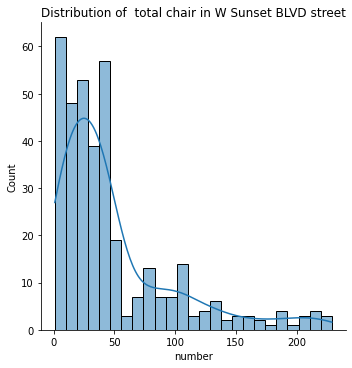

In [65]:
plt.figure(figsize=(50,40))
sns.displot(street_w_sunset['number'], kde=True)
plt.title('Distribution of  total chair in W Sunset BLVD street')
plt.show()

In [66]:
street_w_pico = df[df['address'].str.contains('W PICO BLVD')][['address','number']]
street_w_pico

,address,number
43,5954 W PICO BLVD,18
225,5408 W PICO BLVD,37
359,3809 W PICO BLVD,27
364,10850 W PICO BLVD # 520,17
380,11079 W PICO BLVD,27
...,...,...
9536,5303 W PICO BLVD,40
9540,4760 W PICO BLVD,6
9548,10893 W PICO BLVD,23
9567,8657 W PICO BLVD,135


<Figure size 3600x2880 with 0 Axes>

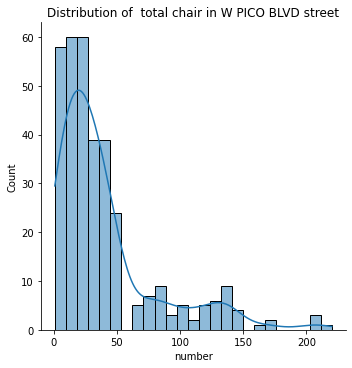

In [67]:
plt.figure(figsize=(50,40))
sns.displot(street_w_pico['number'], kde=True)
plt.title('Distribution of  total chair in W PICO BLVD street')
plt.show()

In [68]:
street_melrose = df[df['address'].str.contains('MELROSE AVE')][['address','number']]
street_melrose


,address,number
18,7160 MELROSE AVE,139
24,7119 MELROSE AVE,43
216,7383 MELROSE AVE,116
276,6101 MELROSE AVE,130
347,5601 MELROSE AVE,33
...,...,...
9485,7461 MELROSE AVE,41
9539,5820 MELROSE AVE,138
9564,7751 1/2 MELROSE AVE,29
9627,7356 MELROSE AVE,101


<Figure size 3600x2880 with 0 Axes>

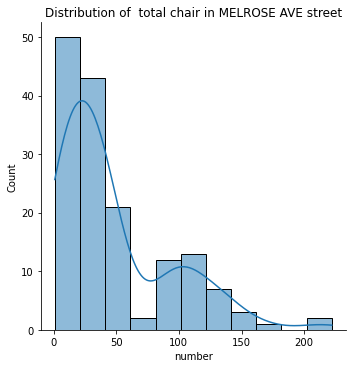

In [69]:
plt.figure(figsize=(50,40))
sns.displot(street_melrose['number'], kde=True)
plt.title('Distribution of  total chair in MELROSE AVE street')
plt.show()

# Presentation Link



Pdf link = https://drive.google.com/file/d/1mJ8he8xyrnpArP14X4sNVwBJKc0Q_9PW/view?usp=sharing

# Conclusion

- In the analysis above, we also look for the characteristics of the type of franchise business. does this type of business have many places with few seats, or vice versa. but with the correlation method we find that the number of places or branches does not affect the number of seats. meaning that there are those that have many branches but also have few seats, or indeed there are also those that have many branches but also have many seats.
- There are 6 types of businesses in this data, namely restaurants, fast food, cafes, pizza, bars, and bakeries.
- Of the 6 types of businesses, 61.89% of them are chain-based businesses or what we usually call franchises. the remaining 38.1% is the type of business type of individual or individual property (non-frachise).
- The average seat for a type of restaurant business is the highest, namely with 29 seats/restaurant and the least is the type of bakery business with 18 seats/restaurant.
- For the type of bakery business, 100% of the business type is a franchise business, but for restaurant businesses only 31.6% are franchise business types, the rest are individual or non-franchise business types.